In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as spc

In [2]:
#formatting plots a little nicer
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text

In [3]:
def brush_input_alternate_kW(H,x,z):
    return (1-alpha) * sigma * Tfire**4 * z * 2 * x * spc.ellipk(-(H-z)**2 / x**2) / (x**2+(H-z)**2)

In [4]:
tmax = 2000
dt = 1
t = np.arange(0,tmax+dt,dt)

dz = 0.05
d0=0
z0 = 0
zmax = 5
z_vals = np.arange(z0,zmax+dz,dz)

In [5]:
alpha = 0.3
k = 2
rho = 2650
kappa = 1e-6
c = k/(rho*kappa)
sigma = 5.67e-8
n=3000
nmax=3000
Tfire=1100+273.15

brush_distance = np.flip(np.arange(0.1,100.1+0.1,0.1))
brush_distance = np.append(brush_distance, 10000*np.ones(len(t)))

In [9]:
d = np.loadtxt('brush_final_placements.txt')
d[-1]

array([0.33, 0.35, 0.37, 0.39, 0.4 , 0.4 , 0.39, 0.37, 0.35, 0.33, 0.31,
       0.29, 0.27, 0.26, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.19, 0.18,
       0.18, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.14, 0.14, 0.14, 0.13,
       0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.09, 0.09,
       0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06])

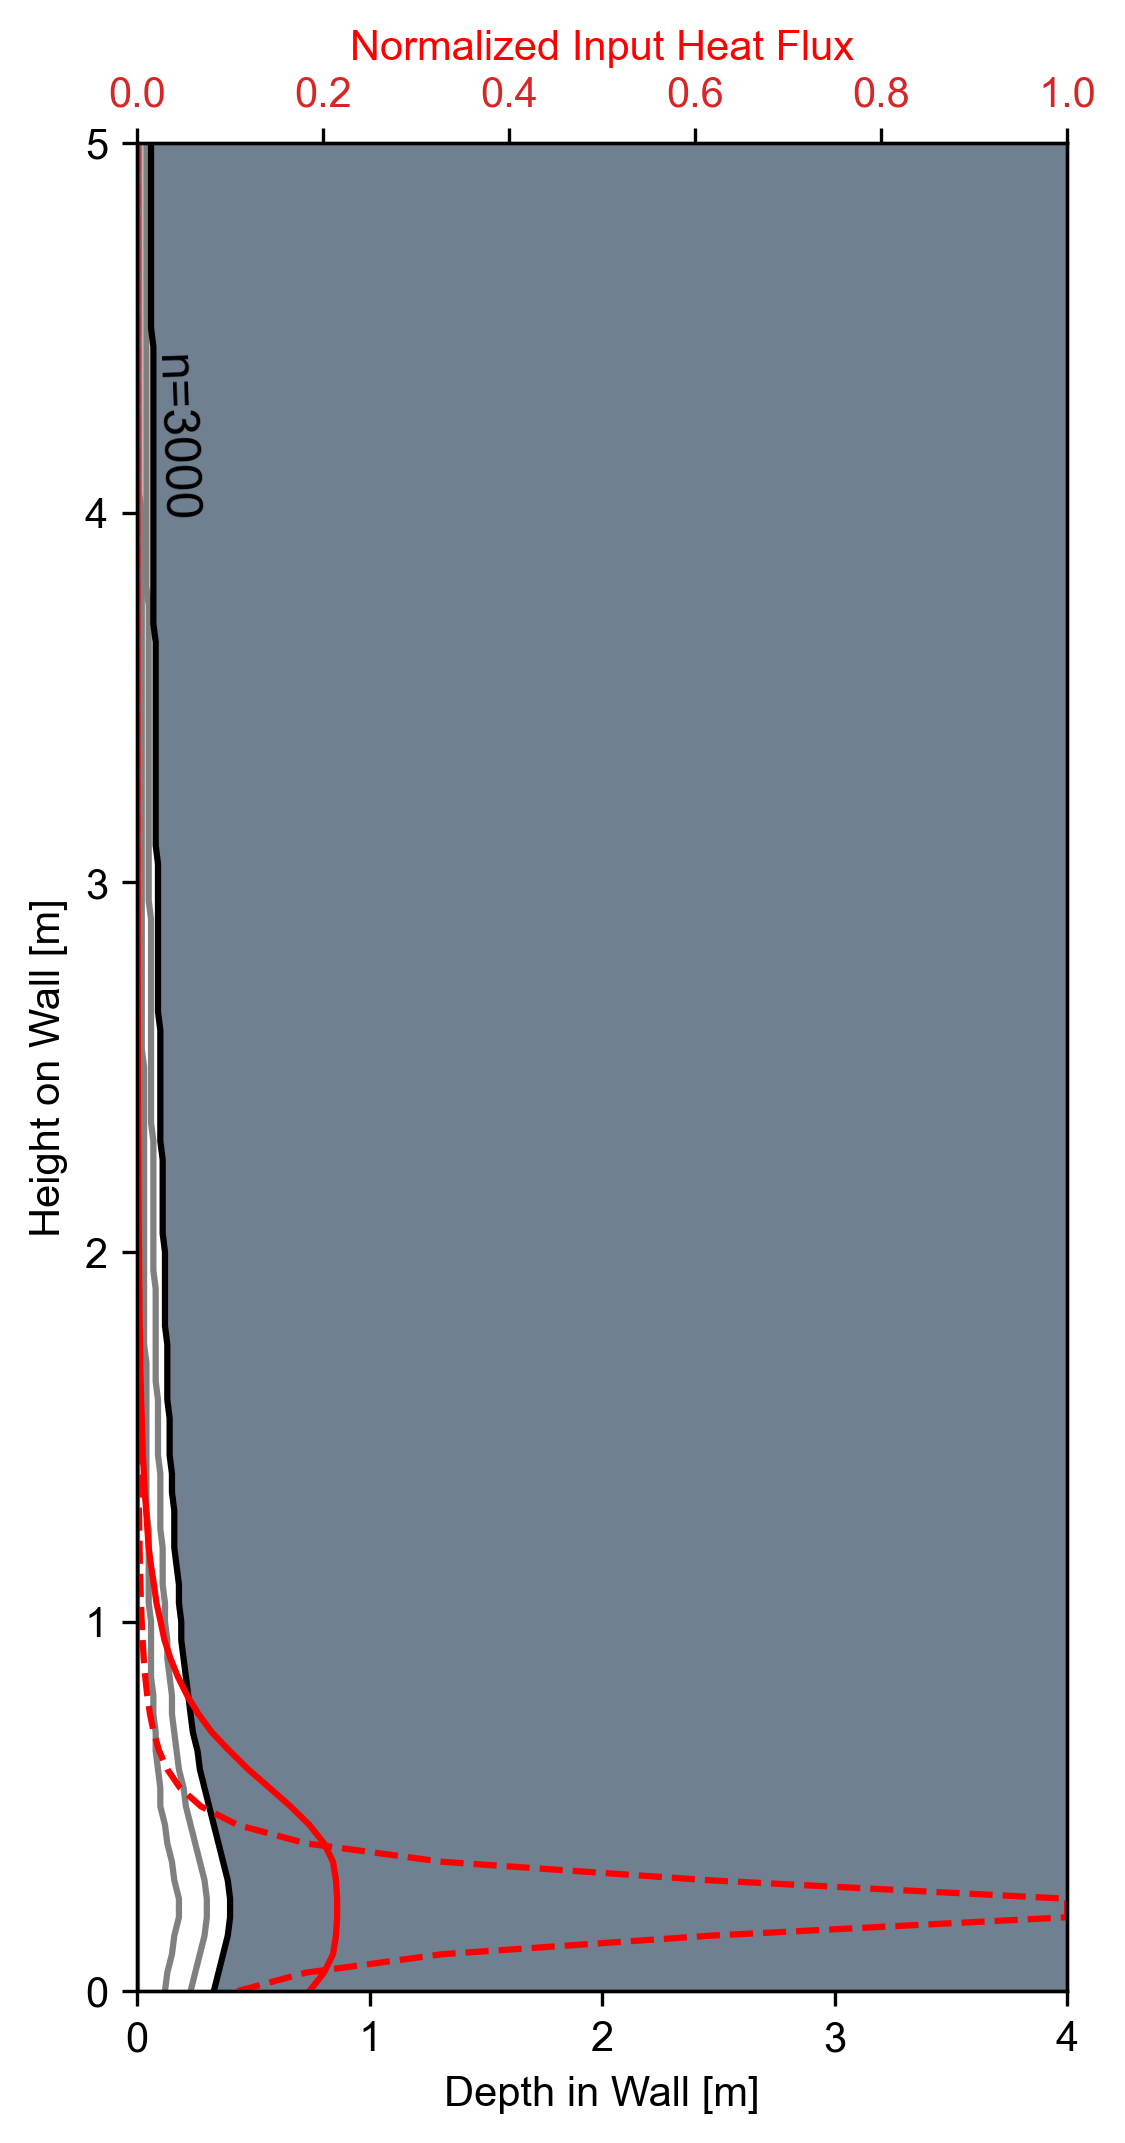

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(4,8), dpi=300)
Qmax = np.max(brush_input_alternate_kW(0.2,0.1,0.225))
Q = np.array([brush_input_alternate_kW(z_vals[z],0.1+d[-1,z],0.225) for z in range(len(z_vals))])
Q0 = np.array([brush_input_alternate_kW(z_vals[z],0.1,0.225) for z in range(len(z_vals))])

ax1.text(0.05,4, 'n={}'.format(3000), fontsize=12, rotation=-88)
#ax1.set_title('Wall Evolution with Damage (Brush)')
ax1.set_ylabel('Height on Wall [m]')
ax1.set_xlabel('Depth in Wall [m]')
ax1.set_xlim(0,4)
ax1.set_ylim(0,5)

ax2 = ax1.twiny()
color = 'tab:red'
ax2.plot(Q/Qmax,z_vals, c='red')
ax2.plot(Q0/Qmax,z_vals, c='red', ls='--')
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(0,1)
ax2.set_xlabel('Normalized Input Heat Flux', color='red')


for n in np.arange(0,3000,1000):
    ax1.plot(d[n,:], z_vals, c='grey')

ax1.plot(d[-1,:], z_vals, c='k')
ax1.fill_betweenx(z_vals,d[-1,:], 7, color='slategrey')
#Q = np.array([Q_in(z_vals[z],50,d[n,z]) for z in range(len(z_vals))])
#ax1.plot((Q/np.max(Q))*3 + 4,z_vals, c='r')

plt.savefig('media/figures/fig13B.pdf')